In [202]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import string
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
import pickle


In [274]:
def clean_data(filename):

    # load data
    file = open(f"./data/{filename}","r+")
    text = file.read()
    file.close()
    
    # split into words
    tokens = word_tokenize(text)
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    filter1 = [w for w in tokens if not w in stop_words if len(w)>3]
    
    # determine tags
    tags = pos_tag(filter1)
    filter2 = [t for t in tags]

    filter3 = [w for w,t in filter2
              if t == "NN"
              or t == "NNS"
              or t == "NNP"
              or t == "NNPS"
              or t == "FW"]

    # convert to lower case
    filter4 = [w.lower() for w in filter3]

    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    filter5 = [w.translate(table) for w in filter4]

    # remove remaining tokens that are not alphabetic
    filter6 = [word for word in filter5 if word.isalpha()]


    lemmatizer = WordNetLemmatizer()
    filter7 = [lemmatizer.lemmatize(word) for word in filter6]
    
    
    results = [word for word in filter7 
        if word !='project' 
        and word !='gutenbergtm'
        and word !='gutenberg'
        and word !='ebook'
        and word !='chapter'
        and word !='work'
        and word !='nothing'
        and word !='thing']
    
    return results
    
    
    
    

In [276]:
def word_cloud(book):
    clean =  clean_data(book)
    
    unique_string=(" ").join(clean)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("your_file_name"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

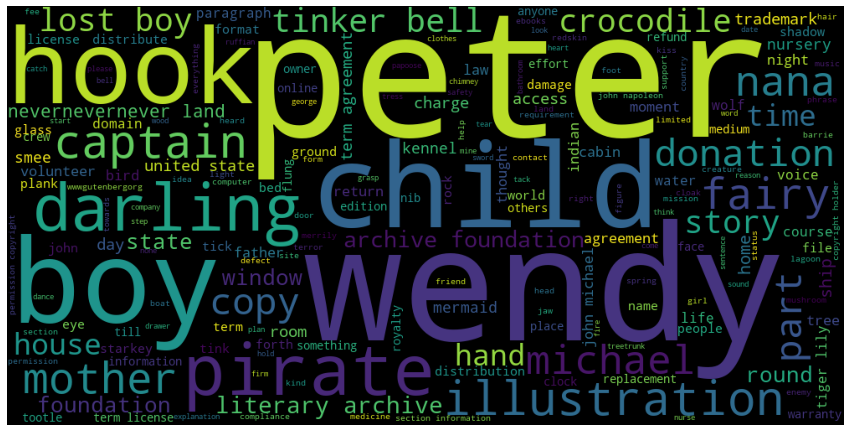

In [277]:
cloud1 = word_cloud('Peter-pan.txt')

In [280]:

def totxt(filename):
    
    cloud2 = clean_data(filename)

    # Open the file in write binary mode
    with open(filename, 'wb') as F:
        # Dump the list to file
        pickle.dump(cloud2, F)

    # To import the list back from disk
    with open (filename, 'rb') as F:
        L2 = pickle.load(F)

    # Print the list and see if it looks the same
    print(L2)

    # Close the file
    F.close()

In [281]:
text = totxt('Peter-pan.txt')

['story', 'peter', 'daniel', 'stephen', 'oconnor', 'anyone', 'restriction', 'reuse', 'term', 'license', 'online', 'wwwgutenbergorg', 'title', 'story', 'peter', 'retold', 'fairy', 'play', 'james', 'barrie', 'author', 'daniel', 'stephen', 'oconnor', 'illustrator', 'alice', 'woodward', 'release', 'date', 'language', 'start', 'this', 'story', 'peter', 'produced', 'david', 'edward', 'matthew', 'wheaton', 'online', 'distributed', 'proofreading', 'canada', 'team', 'http', 'wwwpgdpcanadanet', 'file', 'image', 'internet', 'archiveamerican', 'library', 'illustration', 'with', 'spring', 'come', 'wendy', 'story', 'peter', 'retold', 'from', 'fairy', 'play', 'barrie', 'daniel', 'oconnor', 'illustrated', 'alice', 'woodward', 'toronto', 'musson', 'book', 'company', 'limited', 'printed', 'great', 'britain', 'purnell', 'son', 'paulton', 'somerset', 'england', 'preface', 'barrie', 'creation', 'peter', 'time', 'place', 'heart', 'child', 'age', 'nursery', 'peter', 'wendy', 'tinker', 'bell', 'captain', 'hoo

In [ ]:
def toString():
    textfile = open(book, "w")
        for element in a_list:
    textfile.write(element + "\n")
    textfile.close()

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.set_option("max_rows", 600)
from pathlib import Path  
import glob

In [84]:
directory_path ="/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada"

In [85]:
text_files = glob.glob(f"{directory_path}/*.txt")

In [86]:
text_files

['/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/History of Phosphorus.txt',
 '/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/Mother Storie.txt',
 '/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/Little Lord Fauntleroy.txt',
 '/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/alice-in-wonderland.txt',
 '/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/The History of England from the Accession of James II.txt',
 '/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/The Secret Garden.txt',
 '/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/The History Of The Decline And Fall Of The Roman Empire.txt',
 '/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/Histories of two hundred and fifty-one divisions of the German army which participated in the wa.txt',
 '/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/The Last Leaf.txt',
 '/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/The Chemistry of Cookery.txt',
 '/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/War and Peace.txt',
 '/users/imad/C-DAT-500-PAR-2-1-nlp-im

In [87]:
text_titles = [Path(text).stem for text in text_files]
text_titles

['History of Phosphorus',
 'Mother Storie',
 'Little Lord Fauntleroy',
 'alice-in-wonderland',
 'The History of England from the Accession of James II',
 'The Secret Garden',
 'The History Of The Decline And Fall Of The Roman Empire',
 'Histories of two hundred and fifty-one divisions of the German army which participated in the wa',
 'The Last Leaf',
 'The Chemistry of Cookery',
 'War and Peace',
 'Sandman_s Goodnight Stories',
 'The Toxicity of Caffein An experimental study on different species of animals',
 'Curious Myths of the Middle Ages',
 'An Introductory Course of Quantitative Chemical Analysis',
 'The Eighteenth Brumaire of Louis Bonaparte',
 'O Pioneers',
 'Narrative and Critical History of America',
 'The Handbook of Soap Manufacture',
 'The Foundations of the Origin of Species',
 'The Tale of Timmy Tiptoes',
 'Formation of the Union, 1750-1829',
 'The Ruins',
 'The White Feather',
 'Tom Sawyer Abroad',
 'The Natural Food of Man',
 'The fauna of the deep sea',
 'Medieval Pe

In [105]:
tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words='english')
tfidf_vector = tfidf_vectorizer.fit_transform(text_files)
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names())

In [106]:
tfidf_df 

,00,000,0000,000000,0000161,0000171,0000172,00003,0001,00020,...,ὀξύς,ὁδος,ὕπερθεν_,ὲἱσης,ῥίζαι,⅔rds,⅕th,⅘ths,⅙th,⅞ths
History of Phosphorus,0.000000,0.006823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mother Storie,0.000000,0.001324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Little Lord Fauntleroy,0.000000,0.000428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
alice-in-wonderland,0.000000,0.000794,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
The History of England from the Accession of James II,0.000000,0.008047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
The Secret Garden,0.000000,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
The History Of The Decline And Fall Of The Roman Empire,0.000000,0.009655,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Histories of two hundred and fifty-one divisions of the German army which participated in the wa,0.000000,0.002218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
The Last Leaf,0.001722,0.001567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
The Chemistry of Cookery,0.018415,0.003528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001886,0.000000
